In [96]:
"""
05 MARCH 2024
Adrien Corniere

Making boxplot from different mlr models
"""

import os
from percephone.core.recording import RecordingAmplDet
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
import percephone.core.recording as pc
import percephone.analysis.mlr_models as mlrm
from percephone.plts.stats import boxplot, paired_boxplot
from multiprocessing import pool, cpu_count
%matplotlib inline

In [97]:
directory = "/datas/Théo/Projects/Percephone/data/Amplitude_Detection/loop_format_tau_02/"
roi_info = directory + "FmKO_ROIs&inhibitory.xlsx"
folders = os.listdir(directory)
files = os.listdir(directory)
files_ = [file for file in files if file.endswith("synchro")]

In [98]:
# def oprening_rec(fil,i):
#     rec = pc.RecordingAmplDet(directory + fil + "/", 0, fil, roi_info)
#     mlr_model, name_model = mlrm.r2_model(rec)
#     rec.mlr(mlr_model, name_model)
#     return rec
# 
# workers = cpu_count()
# pool = pool.ThreadPool(processes=workers)
# async_results = [pool.apply_async(oprening_rec, args=(file,i)) for i,file in enumerate(files_)]
# recs = [ar.get() for ar in async_results]

In [99]:
df_exc = pd.DataFrame()
df_inh = pd.DataFrame()
genotypes = ["Genotype"]
tot_exc = ["Total n exc"]
tot_inh = ["Total n inh"]
perc_exc = ["% neurons significant"]
perc_inh = ["% neurons significant"]

# for rec in recs :
for folder in files_:
    path = directory + folder +"/"
    if os.path.isdir(path):
        print(folder)
        rec = pc.RecordingAmplDet(path, 0, roi_info, correction=False)
        mlr_model, name_model = mlrm.precise_stim_model(rec)
        rec.mlr(mlr_model, name_model)
        genotypes.append(rec.genotype)
        df_exc["labels"] = rec.mlr_labels_exc['text_labels']
        df_inh["labels"] = rec.mlr_labels_inh['text_labels']
        df_exc[rec.filename] = rec.mlr_labels_exc['n_neurons_per_label']
        df_inh[rec.filename] = rec.mlr_labels_inh['n_neurons_per_label']
      
        sum_neurons_exc = np.sum(rec.mlr_labels_exc['n_neurons_per_label'])
        sum_neurons_inh = np.sum(rec.mlr_labels_inh['n_neurons_per_label'])
        tot_exc.append(sum_neurons_exc )
        tot_inh.append(sum_neurons_inh)
        percentage_exc =  ((sum_neurons_exc / len(rec.zscore_exc))*100)
        percentage_inh =  ((sum_neurons_inh / len(rec.zscore_inh)) * 100)
        perc_exc.append(percentage_exc)
        perc_inh.append(percentage_inh)
df_exc.loc[len(df_exc.index)] = tot_exc
df_exc.loc[len(df_exc.index)] = tot_inh
df_exc.loc[len(df_exc.index)] = perc_exc
df_exc.loc[len(df_exc.index)] = genotypes
df_exc.to_excel("output_exc.xlsx", sheet_name='mlr_model')

df_inh.loc[len(df_inh.index)] = tot_exc
df_inh.loc[len(df_inh.index)] = tot_inh
df_inh.loc[len(df_inh.index)] = perc_inh
df_inh.loc[len(df_inh.index)] = genotypes
df_inh.to_excel("output_inh.xlsx", sheet_name='mlr_model')

20231102_5889_03_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20221205_4939_04_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20231025_5893_00_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20231009_5886_00_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20220715_4456_00_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20231104_5873_04_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20231104_5881_00_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20231031_5879_00_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20221004_4754_01_synchro
Behavioural information already incorporated in the analog.
MLR model already c

Unnamed: 0             27
labels        Total n exc
5889                   45
4939                   64
5893                   38
5886                   29
4456                  117
5873                   57
5881                   68
5879                   42
4754                   37
5890                   34
4745                  108
5896                   51
4445                   55
4756                   46
Name: 27, dtype: object
5889     45
4939     64
5886     29
4456    117
5873     57
5879     42
4745    108
5896     51
Name: 27, dtype: object
Boxplot plotting.
% Neurons
ShapiroResult(statistic=0.8967276811599731, pvalue=0.26990383863449097)
ShapiroResult(statistic=0.7136152982711792, pvalue=0.016539502888917923)
MannwhitneyuResult(statistic=14.0, pvalue=0.8080808080808081)
Boxplot plotting.
% Neurons
ShapiroResult(statistic=0.8099891543388367, pvalue=0.036578938364982605)
ShapiroResult(statistic=0.8684744834899902, pvalue=0.2917432487010956)
MannwhitneyuResult(statistic=15.0

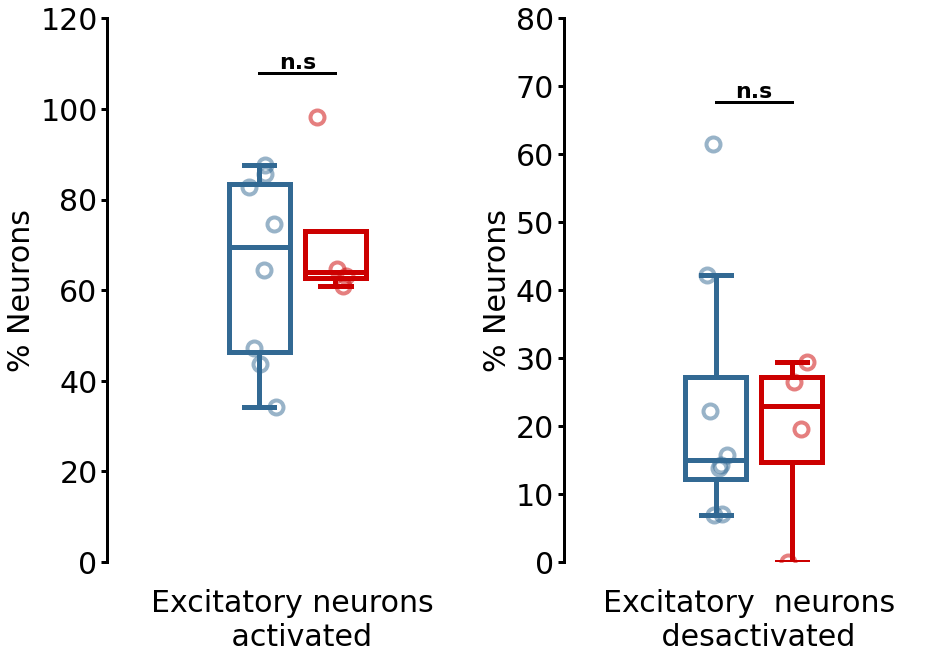

In [100]:
dictionnary_data_exc = pd.read_excel("output_exc.xlsx", sheet_name="mlr_model")
df_exc = pd.DataFrame(dictionnary_data_exc)
genotype_exc = df_exc.iloc[-1]

act_wt_exc = df_exc[df_exc["labels"].str.startswith(('(1', 'Genotype'))]
df_act_exc = pd.DataFrame(act_wt_exc)
wt_act_exc = df_act_exc.iloc[:-1][genotype_exc[genotype_exc == 'WT'].index]
sum_wt_act_exc = wt_act_exc.sum(axis=0)
per_wt_act_exc = (sum_wt_act_exc/df_exc.iloc[-4][genotype_exc == 'WT'])*100
print(df_exc.iloc[-4])
print(df_exc.iloc[-4][genotype_exc == 'WT'])
act_ko_exc = df_exc[df_exc["labels"].str.startswith(('(1', 'Genotype'))]
df_act_exc = pd.DataFrame(act_ko_exc)
ko_act_exc = df_act_exc.iloc[:-1][genotype_exc[genotype_exc == 'KO-Hypo'].index]
sum_KO_act_exc = ko_act_exc.sum(axis=0)
per_ko_act_exc = (sum_KO_act_exc/df_exc.iloc[-4][genotype_exc == 'KO-Hypo'])*100
ylabel1 = '% Neurons'

desact_wt_exc = df_exc[df_exc["labels"].str.startswith(('(-1', 'Genotype'))]
df_desact_exc = pd.DataFrame(desact_wt_exc)
wt_desact_exc = df_desact_exc.iloc[:-1][genotype_exc[genotype_exc == 'WT'].index]
sum_wt_desact_exc = wt_desact_exc.sum(axis=0)
per_wt_desact_exc = (sum_wt_desact_exc / df_exc.iloc[-4][genotype_exc == 'WT']) * 100
desact_ko_exc = df_exc[df_exc["labels"].str.startswith(('(-1', 'Genotype'))]
df_desact_exc = pd.DataFrame(desact_ko_exc)
ko_desact_exc = df_desact_exc.iloc[:-1][genotype_exc[genotype_exc =='KO-Hypo'].index]
sum_KO_desact_exc = ko_desact_exc.sum(axis=0)
per_ko_desact_exc = (sum_KO_desact_exc / df_exc.iloc[-4][genotype_exc == 'KO-Hypo']) * 100
ylabel2_exc = '% Neurons'

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

boxplot(ax[0],list(per_wt_act_exc), list(per_ko_act_exc), ylabel1)
ax[0].set_xlabel("Excitatory neurons \n activated", fontsize=30)
ax[0].xaxis.set_label_coords(0.5, -0.05)
boxplot(ax[1],list(per_wt_desact_exc), list(per_ko_desact_exc),ylabel2_exc, ylim=[0,80])
ax[1].set_xlabel("Excitatory  neurons \n desactivated", fontsize=30)
ax[1].xaxis.set_label_coords(0.5, -0.05)
 

Boxplot plotting.
% neurons act
ShapiroResult(statistic=0.875515341758728, pvalue=0.17053475975990295)
ShapiroResult(statistic=0.9557526707649231, pvalue=0.7521847486495972)
Ttest_indResult(statistic=-0.31942761342348674, pvalue=0.7559752810804783)
Boxplot plotting.
% neurons desact
ShapiroResult(statistic=0.9517624974250793, pvalue=0.7289835214614868)
ShapiroResult(statistic=0.9627164602279663, pvalue=0.7959912419319153)
Ttest_indResult(statistic=0.17190863225883143, pvalue=0.8669384929414669)


Text(0, 0.5, '')

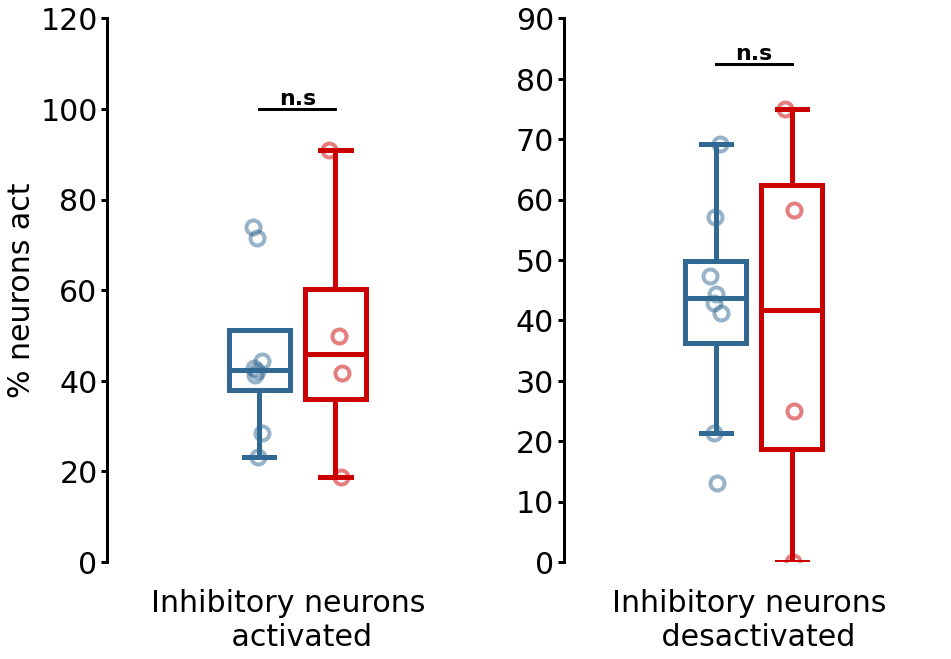

In [101]:
dictionnary_data_inh = pd.read_excel("output_inh.xlsx", sheet_name="mlr_model")
df_inh = pd.DataFrame(dictionnary_data_inh)
genotype_inh = df_inh.iloc[-1]

act_wt_inh = df_inh[df_inh["labels"].str.startswith(('(1', 'Genotype'))]
df_act_inh = pd.DataFrame(act_wt_inh)
wt_act_inh = df_act_inh.iloc[:-1][genotype_exc[genotype_inh == 'WT'].index]
sum_wt_act_inh = wt_act_inh.sum(axis=0)
per_wt_act_inh =  ((sum_wt_act_inh / df_inh.iloc[-3][genotype_inh == 'WT']) * 100)
act_ko_inh = df_inh[df_inh["labels"].str.startswith(('(1', 'Genotype'))]
df_act = pd.DataFrame(act_ko_inh)
ko_act_inh = df_act.iloc[:-1][genotype_inh[genotype_inh == 'KO-Hypo'].index]
sum_KO_act_inh = ko_act_inh.sum(axis=0)
per_ko_act_inh =  ((sum_KO_act_inh / df_inh.iloc[-3][genotype_inh == 'KO-Hypo']) * 100)
ylabel1_inh = '% neurons act'

desact_wt_inh = df_inh[df_inh["labels"].str.startswith(('(-1', 'Genotype'))]
df_desact_inh = pd.DataFrame(desact_wt_inh)
wt_desact_inh = df_desact_inh.iloc[:-1][genotype_inh[genotype_inh == 'WT'].index]
sum_wt_desact_inh = wt_desact_inh.sum(axis=0)
per_wt_desact_inh =  ((sum_wt_desact_inh / df_exc.iloc[-3][genotype_inh == 'WT']) * 100)
desact_ko_inh = df_inh[df_inh["labels"].str.startswith(('(-1', 'Genotype'))]
df_desact_inh = pd.DataFrame(desact_ko_inh)
ko_desact_inh = df_desact_inh.iloc[:-1][genotype_inh[genotype_inh == 'KO-Hypo'].index]
sum_KO_desact_inh = ko_desact_inh.sum(axis=0)
per_ko_desact_inh =  ((sum_KO_desact_inh / df_exc.iloc[-3][genotype_exc == 'KO-Hypo']) * 100)
ylabel2_inh = '% neurons desact'

fig_inh, axs_inh = plt.subplots(1, 2, figsize=(15, 10), sharey=False)
boxplot(axs_inh[0], list(per_wt_act_inh), list(per_ko_act_inh), ylabel1_inh)
axs_inh[0].set_xlabel("Inhibitory neurons  \n activated", fontsize=30)
axs_inh[0].xaxis.set_label_coords(0.5, -0.05)
boxplot(axs_inh[1],list(per_wt_desact_inh), list(per_ko_desact_inh), ylabel2_inh,ylim=[0,90])
axs_inh[1].set_xlabel("Inhibitory neurons \n desactivated", fontsize=30)
axs_inh[1].xaxis.set_label_coords(0.5, -0.05)
axs_inh[1].set_ylabel(None)


Boxplot plotting.
Neurons (%)
ShapiroResult(statistic=0.883460283279419, pvalue=0.203167125582695)
ShapiroResult(statistic=0.837830126285553, pvalue=0.189150869846344)
Ttest_indResult(statistic=-0.7063713605183176, pvalue=0.4960852416650735)
Boxplot plotting.
Neurons (%)
ShapiroResult(statistic=0.9326242208480835, pvalue=0.5402616858482361)
ShapiroResult(statistic=0.8519439697265625, pvalue=0.23251816630363464)
Ttest_indResult(statistic=0.5328504344211471, pvalue=0.6057749254504565)


Text(0, 0.5, '')

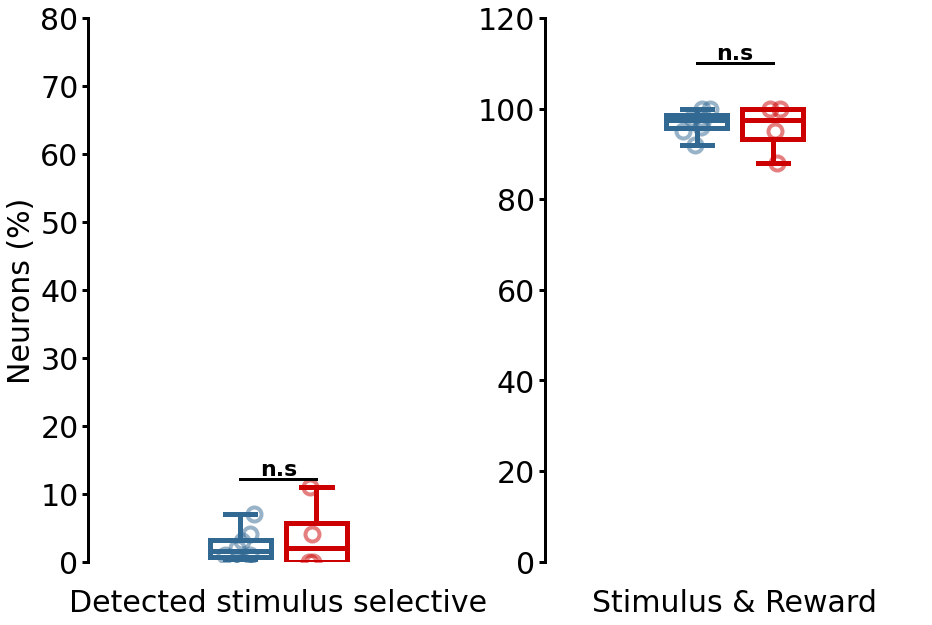

In [102]:
df_select = pd.read_excel("output_exc.xlsx", sheet_name="mlr_model")
df_unselect = df_select.drop(df_select.index[-4:,])
genotype_exc = df_select.iloc[-1]
data_select = ['(1, 1, 0)', '(-1, -1, 0)', '(1, -1, 0)', '(-1, 1, 0)']
data_select_wt = df_select[df_select['labels'].isin(data_select)][genotype_exc[genotype_exc == 'WT'].index]
sum_data_select_wt = data_select_wt.sum(axis=0)
per_sum_data_select_wt =  ((sum_data_select_wt / df_exc.iloc[-4][genotype_exc == 'WT']) * 100)
data_select_ko = df_select[df_select['labels'].isin(data_select)][genotype_exc[genotype_exc == 'KO-Hypo'].index]
sum_data_select_ko = data_select_ko.sum(axis=0)
per_sum_data_select_ko =  ((sum_data_select_ko / df_exc.iloc[-4][genotype_exc == 'KO-Hypo']) * 100)
data_unselect_wt = df_unselect[~df_unselect['labels'].isin(data_select)][genotype_exc[genotype_exc == 'WT'].index]
sum_data_unselect_wt = data_unselect_wt.sum(axis=0)
per_sum_data_unselect_wt =  ((sum_data_unselect_wt / df_exc.iloc[-4][genotype_exc == 'WT']) * 100)
data_unselect_ko = df_unselect[~df_unselect['labels'].isin(data_select)][genotype_exc[genotype_exc == 'KO-Hypo'].index]
sum_data_unselect_ko = data_unselect_ko.sum(axis=0)
per_sum_data_unselect_ko = (sum_data_unselect_ko / df_exc.iloc[-4][genotype_exc == 'KO-Hypo']) * 100
fig_exc, axs_exc = plt.subplots(1, 2, figsize=(15, 10), sharey=False)
boxplot(axs_exc[0], np.array(per_sum_data_select_wt, "int"), np.array(per_sum_data_select_ko,"int"), "Neurons (%)", ylim=[0,80])
axs_exc[0].set_xlabel("Detected stimulus selective", fontsize=30)
axs_exc[0].xaxis.set_label_coords(0.5, -0.05)
boxplot(axs_exc[1], np.array(per_sum_data_unselect_wt, "int"), np.array(per_sum_data_unselect_ko, "int"),"Neurons (%)")
axs_exc[1].set_xlabel("Stimulus & Reward", fontsize = 30)
axs_exc[1].xaxis.set_label_coords(0.5, -0.05)
axs_exc[1].set_ylabel(None)


Boxplot plotting.
Neurons (%)
ShapiroResult(statistic=1.0, pvalue=1.0)
ShapiroResult(statistic=0.6297762393951416, pvalue=0.001240724348463118)
MannwhitneyuResult(statistic=12.0, pvalue=0.2159249389401403)
Boxplot plotting.
Neurons (%)
ShapiroResult(statistic=0.9778702855110168, pvalue=0.9516081809997559)
ShapiroResult(statistic=0.979725182056427, pvalue=0.9004049301147461)
Ttest_indResult(statistic=0.6617731615814023, pvalue=0.5230726969501485)


/home/theogauvrit/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Text(0, 0.5, '')

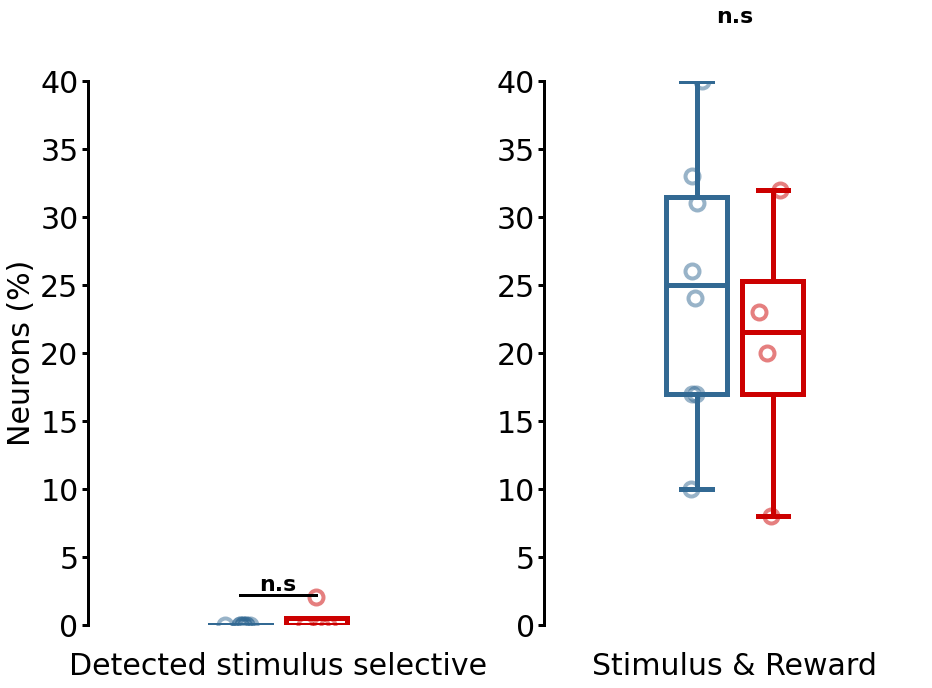

In [103]:
df_select_inh = pd.read_excel("output_inh.xlsx", sheet_name="mlr_model")
df_unselect_inh = df_select_inh.drop(df_select_inh.index[-4:,])
genotype_inh = df_select_inh.iloc[-1]
data_select_inh = ['(1, 1, 0)', '(-1, -1, 0)', '(1, -1, 0)', '(-1, 1, 0)']
data_select_wt_inh = df_select_inh[df_select_inh['labels'].isin(data_select_inh)][genotype_inh[genotype_inh == 'WT'].index]
sum_data_select_wt_inh = data_select_wt_inh.sum(axis=0)
per_sum_data_select_wt_inh =((sum_data_select_wt_inh / df_inh.iloc[-4][genotype_inh == 'WT']) * 100)
data_select_ko_inh = df_select_inh[df_select_inh['labels'].isin(data_select_inh)][genotype_inh[genotype_inh == 'KO-Hypo'].index]
sum_data_select_ko_inh = data_select_ko_inh.sum(axis=0)
per_sum_data_select_ko_inh = ((sum_data_select_ko_inh / df_inh.iloc[-4][genotype_inh == 'KO-Hypo']) * 100)
data_unselect_wt_inh = df_unselect_inh[~df_unselect_inh['labels'].isin(data_select_inh)][genotype_inh[genotype_inh == 'WT'].index]
sum_data_unselect_wt_inh = data_unselect_wt_inh.sum(axis=0)
per_sum_data_unselect_wt_inh = ((sum_data_unselect_wt_inh / df_inh.iloc[-4][genotype_inh == 'WT']) * 100)
data_unselect_ko_inh = df_unselect_inh[~df_unselect_inh['labels'].isin(data_select_inh)][genotype_inh[genotype_inh == 'KO-Hypo'].index]
sum_data_unselect_ko_inh = data_unselect_ko_inh.sum(axis=0)
per_sum_data_unselect_ko_inh = ((sum_data_unselect_ko_inh / df_inh.iloc[-4][genotype_inh == 'KO-Hypo']) * 100)
fig_select_inh, axs_select_inh = plt.subplots(1, 2, figsize=(15, 10), sharey=False)
boxplot(axs_select_inh[0], np.array(per_sum_data_select_wt_inh, "int"), np.array(per_sum_data_select_ko_inh,"int"), "Neurons (%)", ylim=[0,40])
axs_select_inh[0].set_xlabel("Detected stimulus selective", fontsize=30)
axs_select_inh[0].xaxis.set_label_coords(0.5, -0.05)
boxplot(axs_select_inh[1], np.array(per_sum_data_unselect_wt_inh, "int"), np.array(per_sum_data_unselect_ko_inh, "int"),"Neurons (%)", ylim=[0,40])
axs_select_inh[1].set_xlabel("Stimulus & Reward", fontsize = 30)
axs_select_inh[1].xaxis.set_label_coords(0.5, -0.05)
axs_select_inh[1].set_ylabel(None)
